In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('data/covid_reports.json')

In [4]:
df.head()

,province,last_updated,data
0,All,2021-12-30 10:15:03,"{'date': '2020-01-25', 'change_cases': 1, 'cha..."
1,All,2021-12-30 10:15:03,"{'date': '2020-01-26', 'change_cases': 1, 'cha..."
2,All,2021-12-30 10:15:03,"{'date': '2020-01-27', 'change_cases': 0, 'cha..."
3,All,2021-12-30 10:15:03,"{'date': '2020-01-28', 'change_cases': 1, 'cha..."
4,All,2021-12-30 10:15:03,"{'date': '2020-01-29', 'change_cases': 0, 'cha..."


Only the data column is of interest so we build a new dataframe.

In [5]:
df_data_list = df.data.tolist()
df_data = pd.DataFrame(df_data_list)

In [7]:
df_data

,date,change_cases,change_fatalities,change_tests,change_hospitalizations,change_criticals,change_recoveries,change_vaccinations,change_vaccinated,change_boosters_1,...,total_cases,total_fatalities,total_tests,total_hospitalizations,total_criticals,total_recoveries,total_vaccinations,total_vaccinated,total_boosters_1,total_vaccines_distributed
0,2020-01-25,1,0,2,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
1,2020-01-26,1,0,4,0,0,0,0,0,0,...,2,0,6,0,0,0,0,0,0,0
2,2020-01-27,0,0,20,0,0,0,0,0,0,...,2,0,26,0,0,0,0,0,0,0
3,2020-01-28,1,0,10,0,0,0,0,0,0,...,3,0,36,0,0,0,0,0,0,0
4,2020-01-29,0,0,3,0,0,0,0,0,0,...,3,0,39,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2021-12-26,22226,17,63935,0,0,1796,13907,264,13137,...,2018735,30169,52154883,1761,462,1827067,67207931,29367201,6195236,73907682
702,2021-12-27,22413,3,62568,-28,12,8486,82118,1866,76778,...,2041148,30172,52217451,1733,474,1835553,67290049,29369067,6272014,73907682
703,2021-12-28,28118,46,184142,266,23,10429,279260,8837,257143,...,2069266,30218,52401593,1999,497,1845982,67569309,29377904,6529157,73907682
704,2021-12-29,32563,35,242957,419,2,11229,515684,13661,461940,...,2101829,30253,52644550,2418,499,1857211,68084993,29391565,6991097,73907682


In [8]:
df_data['date'] = pd.to_datetime(df_data['date'])
# Group by weekly
df_weekly = df_data.groupby([pd.Grouper(key='date', freq='W-MON')])['change_cases'].sum().reset_index().sort_values('date')
# Truncate previous week to align with reviews available
df_weekly = df_weekly[:-1]

In [9]:
with open('data/reviews_df.csv') as f:
    df_reviews = pd.read_csv(f)

In [10]:
df_reviews.head()

,date,noscent_counter
1,2020-01-27,0
2,2020-02-03,0
3,2020-02-10,0
4,2020-02-17,0
5,2020-02-24,0


Plot everything together.

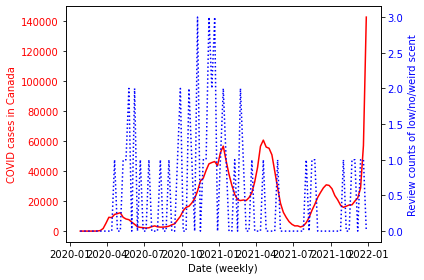

In [11]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('Date (weekly)')
ax1.set_ylabel('COVID cases in Canada', color=color)
ax1.plot(df_weekly.date, df_weekly['change_cases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Review counts of low/no/weird scent', color=color)
ax2.plot(df_weekly.date, df_reviews.noscent_counter, ls=':', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()